In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mat = np.load("Data/faceMatrix.npy").astype('float')
mat = mat.transpose()

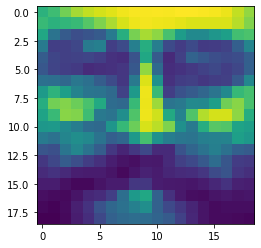

In [3]:
# test everything works fine
im = mat[1,0:].reshape(19,19)
plt.imshow(im)

In [4]:
# the objective function
def obj_func(set):
    sum = 0;
    for s1 in set:
        for s2 in set:
            sum += np.linalg.norm(s1-s2,2)
    return sum

In [5]:
# first approach: 
# use k-means and choose k images that are near centroids
from scipy.cluster.vq import vq, kmeans, whiten

def findPointNearCentroid(centroid, points):
    min_dif = np.infty
    point = None
    for p in points:
        dif = np.linalg.norm(p - centroid, 2)
        if dif < min_dif:
            point = p
            min_dif = dif
    return point
    

def approach1(N):    
    cluster = kmeans(mat, 25)
    centroids = cluster[0]
    optimal_set = []

    for c in centroids:
        point = findPointNearCentroid(c, mat)
        optimal_set.append(point)
        
    return obj_func(optimal_set)
    


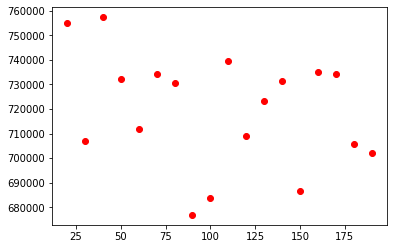

In [58]:
#test approach 1

x = []
y = []

for N in range(20,200,10):
    res = approach1(N)
    x.append(N)
    y.append(res)
    
    
plt.plot(x,y, 'ro')

In [63]:
res = approach1(19*19)

In [64]:
res


717258.386978937

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spatial

N, K, ND = 100000, 200, 19*19
MAX_LOOPS = 20

data = mat

def distances(ndarray_0, ndarray_1):
    if (ndarray_0.ndim, ndarray_1.ndim) not in ((1, 2), (2, 1)):
        raise ValueError("bad ndarray dimensions combination")
    return np.linalg.norm(ndarray_0 - ndarray_1, axis=1)

# start with the K points closest to the mean
# (the copy() is only to avoid a view into an otherwise unused array)
indices = np.argsort(distances(data, data.mean(0)))[:K].copy()
# distsums is, for all N points, the sum of the distances from the K points
distsums = spatial.distance.cdist(data, data[indices]).sum(1)
# but the K points themselves should not be considered
# (the trick is that -np.inf ± a finite quantity always yields -np.inf)
distsums[indices] = -np.inf
prev_sum = 0.0
for loop in range(MAX_LOOPS):
    for i in range(K):
        # remove this point from the K points
        old_index = indices[i]
        # calculate its sum of distances from the K points
        distsums[old_index] = distances(data[indices], data[old_index]).sum()
        # update the sums of distances of all points from the K-1 points
        distsums -= distances(data, data[old_index])
        # choose the point with the greatest sum of distances from the K-1 points
        new_index = np.argmax(distsums)
        # add it to the K points replacing the old_index
        indices[i] = new_index
        # don't consider it any more in distsums
        distsums[new_index] = -np.inf
        # update the sums of distances of all points from the K points
        distsums += distances(data, data[new_index])
    # sum all mutual distances of the K points
    curr_sum = spatial.distance.pdist(data[indices]).sum()
    # break if the sum hasn't changed
    if curr_sum == prev_sum:
        break
    prev_sum = curr_sum

In [11]:
prev_sum


67132687.92607872

In [68]:
prev_sum - res

36800540.96066679

In [12]:
data.mean(0).shape

(2429,)

In [13]:
# start with the K points closest to the mean
# (the copy() is only to avoid a view into an otherwise unused array)
indices = np.argsort(distances(data, data.mean(0)))[:K].copy()
# distsums is, for all N points, the sum of the distances from the K points
distsums = spatial.distance.cdist(data, data[indices]).sum(1)

In [15]:
indices.shape

(200,)